In [1]:
import numpy as np

### Load Features, Names, and Labels

In [2]:
train_features_path =  "../feature/ICDAR-RESNET-feature/train_features_triplet_loss.npy"
train_names_path = "../feature/ICDAR-RESNET-feature/train_names.npy"
train_labels_path = "../feature/ICDAR-RESNET-feature/train_labels.npy"

test_features_path = "../feature/ICDAR-RESNET-feature/test_features_triplet_loss.npy"
test_names_path = "../feature/ICDAR-RESNET-feature/test_names.npy"
test_labels_path = "../feature/ICDAR-RESNET-feature/test_labels.npy"

validation_features_path = "../feature/ICDAR-RESNET-feature/validation_features_triplet_loss.npy"
validation_names_path = "../feature/ICDAR-RESNET-feature/validation_names.npy"
validation_labels_path = "../feature/ICDAR-RESNET-feature/validation_labels.npy"

In [3]:
train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

In [4]:
print("train_features shape : ", train_features.shape)
print("test_features shape : ", test_features.shape)
print("validation_features shape : ", validation_features.shape)

train_features shape :  (857, 2048)
test_features shape :  (401, 2048)
validation_features shape :  (391, 2048)


### Feature Gallery

In [5]:
# Feature Gallery dilakukan untuk setiap kelas / nama seperti "001", "002", "003", dst dengan cara mengambil data training positive dan mengambil mean / rata-rata dari data tersebut
def create_feature_gallery(train_features, train_names, train_labels):
    gallery_feature = []
    gallery_name = []

    unique_names = set(train_names.flatten())
    sorted_names = sorted(unique_names)

    for name in sorted_names:
        # print(name)
        # print(name)
        name_features = []

        for feature, feature_name, label in zip(train_features, train_names, train_labels):
            # print(feature, feature_name, label)
            if name in feature_name and label == 1:
                name_features.append(feature)

        if name_features:
            # print(name_features)
            average_feature = np.mean(name_features, axis=0)
            gallery_feature.append(average_feature)
            gallery_name.append(name)

    return gallery_feature, gallery_name

In [6]:
gallery_features, gallery_names = create_feature_gallery(train_features, train_names, train_labels)

In [7]:
gallery_feature_path = "../feature/ICDAR-RESNET-feature/gallery_features_triplet_loss.npy"
gallery_name_path = "../feature/ICDAR-RESNET-feature/gallery_names.npy"

In [8]:
np.save(gallery_feature_path, gallery_features)
np.save(gallery_name_path, gallery_names)

In [9]:
gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

In [10]:
gallery_features_array = np.array(gallery_features)
print("gallery features shape : ", gallery_features_array.shape)

gallery features shape :  (64, 2048)


### Euclidean Distance

In [11]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

In [12]:
def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [13]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Split Euclidean Distance to Positive and Negative for Future Use (If needed)

In [14]:
def split_euc_dist(euclidean_distances, euclidean_names, euclidean_actual_labels):
    positive_distance = []
    positive_name = []
    positive_label = []
    negative_distance = []
    negative_name = []
    negative_label = []

    for euclidean_distance, euclidean_name, euclidean_actual_label in zip(euclidean_distances, euclidean_names, euclidean_actual_labels):
        pos_dist = []
        neg_dist = []
        pos_lab = []
        neg_lab = []
        for distance, label in zip(euclidean_distance, euclidean_actual_label):
            if label == 0:
                neg_dist.append(distance)
                neg_lab.append(label)
            else:
                pos_dist.append(distance)
                pos_lab.append(label)

        positive_distance.append(pos_dist)
        positive_name.append(euclidean_name)
        positive_label.append(pos_lab)

        negative_distance.append(neg_dist)
        negative_name.append(euclidean_name)
        negative_label.append(neg_lab)
        # print(euclidean_distance, euclidean_name, euclidean_actual_label)

    return positive_distance, negative_label

In [15]:
train_positive_dist, train_negative_dist = split_euc_dist(train_euclidean_distances, train_names, train_euclidean_actual_labels)
test_positive_dist, test_negative_dist = split_euc_dist(test_euclidean_distances, test_names, test_euclidean_actual_labels)
validation_positive_dist, validation_negative_dist = split_euc_dist(validation_euclidean_distances, validation_names, validation_euclidean_actual_labels)

In [16]:
flat_train_positive_dist = [item for sublist in train_positive_dist for item in sublist]
flat_train_negative_dist = [item for sublist in train_negative_dist for item in sublist]
flat_test_positive_dist = [item for sublist in test_positive_dist for item in sublist]
flat_test_negative_dist = [item for sublist in test_negative_dist for item in sublist]
flat_validation_positive_dist = [item for sublist in validation_positive_dist for item in sublist]
flat_validation_negative_dist = [item for sublist in validation_negative_dist for item in sublist]

print(f'Train total : {len(flat_train_positive_dist) + len(flat_train_negative_dist)}')
print(f'  Train pos : {len(flat_train_positive_dist)}')
print(f'  Train neg : {len(flat_train_negative_dist)}')
print(f' Test total : {len(flat_test_positive_dist) + len(flat_test_negative_dist)}')
print(f'   Test pos : {len(flat_test_positive_dist)}')
print(f'   Test neg : {len(flat_test_negative_dist)}')
print(f'  Val total : {len(flat_validation_positive_dist) + len(flat_validation_negative_dist)}')
print(f'    Val pos : {len(flat_validation_positive_dist)}')
print(f'    Val neg : {len(flat_validation_negative_dist)}')

Train total : 857
  Train pos : 463
  Train neg : 394
 Test total : 401
   Test pos : 212
   Test neg : 189
  Val total : 391
    Val pos : 212
    Val neg : 179


### Normalize Euclidean Distance

In [17]:
# Flatten the lists of distances
flat_test_distances = [item for sublist in test_euclidean_distances for item in sublist]
flat_train_distances = [item for sublist in train_euclidean_distances for item in sublist]
flat_validation_distances = [item for sublist in validation_euclidean_distances for item in sublist]

In [18]:
print(flat_train_distances)

[44.68356, 37.76576, 42.138958, 34.779465, 44.008915, 48.884045, 47.9125, 48.95243, 54.024353, 42.152157, 57.356922, 44.417606, 41.218105, 37.260624, 60.50986, 60.43685, 60.4346, 72.69793, 32.614445, 41.293606, 33.94937, 35.36554, 33.706253, 30.099886, 42.813675, 32.084038, 43.073833, 53.353638, 37.243675, 31.925089, 31.66559, 33.974354, 44.677834, 37.172325, 48.558327, 53.11305, 41.802505, 46.786587, 34.168583, 28.010218, 32.75772, 33.22265, 31.254604, 48.073483, 30.000612, 36.491898, 32.771835, 43.986095, 34.882145, 41.090332, 33.442524, 32.551563, 66.04265, 57.701042, 38.279648, 51.634308, 68.64653, 44.483025, 42.05287, 42.215164, 42.692703, 42.724476, 36.490623, 38.754616, 42.22431, 37.827236, 40.105537, 32.96253, 37.069824, 40.00248, 52.86507, 45.007526, 46.92925, 64.819466, 47.78995, 50.110634, 60.312473, 55.70113, 54.64602, 29.390026, 42.94817, 25.66698, 29.428013, 30.74952, 29.723776, 28.055208, 33.103252, 28.585089, 24.124468, 24.956774, 27.40592, 30.150034, 54.111526, 32.1401

In [19]:
for name, distance, label in zip(test_names, flat_test_distances, test_labels):
    print(name, distance, label)

001 48.06357 1
001 43.409927 1
001 54.403793 1
001 46.01751 1
001 46.942112 1
001 50.523632 0
001 55.70497 0
002 38.653786 1
002 35.00338 1
002 36.536373 1
002 30.277538 1
002 29.656706 1
002 46.249187 0
002 52.40511 0
002 53.60304 0
003 59.920376 1
003 36.80037 1
003 33.232937 1
003 34.61133 1
003 50.89363 1
003 39.246826 0
003 38.908943 0
003 28.410854 0
004 54.387817 1
004 51.394337 1
004 42.18795 1
004 38.961178 1
004 37.404526 1
004 43.209663 0
004 46.35688 0
004 52.347775 0
006 32.438164 1
006 35.18044 1
006 40.254784 1
006 30.227577 1
006 27.464136 1
006 37.09935 0
006 31.247503 0
006 28.066328 0
009 31.946177 1
009 36.163853 1
009 35.8231 1
009 47.58904 1
009 30.070084 1
009 61.010242 0
009 37.37725 0
009 38.323063 0
012 49.21365 1
012 55.896008 1
012 37.006897 1
012 46.91379 1
012 34.733856 1
012 59.516098 0
012 69.49096 0
012 59.08597 0
013 40.414436 1
013 35.24609 1
013 30.397202 1
013 49.11913 0
013 45.227383 0
013 38.75574 0
014 32.611248 1
014 28.543375 1
014 44.411354 1


In [20]:
def get_min_max(euclidean_distances):
    min_distance = min(euclidean_distances)
    max_distance = max(euclidean_distances)

    return min_distance, max_distance

In [21]:
min_val, max_val = get_min_max(flat_train_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_validation_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_test_distances)
print(f'min: {min_val}, max: {max_val}')

min: 18.731101989746094, max: 223.31829833984375
min: 22.55691909790039, max: 221.68563842773438
min: 22.211227416992188, max: 223.70156860351562


In [22]:
def normalize_distance(euclidean_distances, min_val, max_val):
    all_distance = []

    for distance in euclidean_distances:
        normalized_distance = (distance - min_val) / (max_val - min_val)

        # in case test and train distances are beyond max of train
        if normalized_distance > 1:
            normalized_distance = 1
        elif normalized_distance < 0:
            normalized_distance = 0
        
        all_distance.append(normalized_distance)

    return all_distance

def reverse_normalized_distance(euclidean_distances, min_val, max_val):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances, min_val, max_val)
    for distance in normalized_distances:
        distance = -distance
        reverse_distance.append(distance)

    return reverse_distance

In [23]:
# normalized_positive_distances = reverse_normalized_distance(positive_distance)
# normalized_negative_distances = reverse_normalized_distance(negative_distance)

In [24]:
normalized_test_euclidean_distance = reverse_normalized_distance(flat_test_distances, min_val, max_val)
normalized_train_euclidean_distance = reverse_normalized_distance(flat_train_distances, min_val, max_val)
normalized_validation_euclidean_distance = reverse_normalized_distance(flat_validation_distances, min_val, max_val)

In [25]:
print(normalized_test_euclidean_distance)

[-0.12830561, -0.10520951, -0.15977225, -0.11815099, -0.1227398, -0.14051494, -0.16623002, -0.0816047, -0.06348767, -0.07109594, -0.04003324, -0.036952037, -0.119300805, -0.14985275, -0.15579809, -0.18715115, -0.07240616, -0.054700933, -0.06154191, -0.14235125, -0.08454797, -0.08287105, -0.030768855, -0.15969296, -0.14483626, -0.09914482, -0.08313029, -0.0754046, -0.1042156, -0.11983529, -0.1495682, -0.05075646, -0.064366415, -0.08955048, -0.03978528, -0.026070276, -0.07389001, -0.04484719, -0.029058965, -0.048314717, -0.06924712, -0.067555964, -0.12595052, -0.039003637, -0.19256017, -0.07526923, -0.07996331, -0.13401349, -0.16717814, -0.073431164, -0.122599244, -0.06215002, -0.18514471, -0.23465012, -0.18300998, -0.090342835, -0.064692244, -0.04062713, -0.13354437, -0.11422957, -0.0821107, -0.05161548, -0.031426556, -0.11017961, -0.062540255, -0.032004584, -0.13365759, -0.1398245, -0.10864769, -0.09974194, -0.023629736, -0.028809842, -0.0, -0.03903143, -0.0597847, -0.09975451, -0.0210

In [26]:
for name, distance, label in zip(test_names, normalized_test_euclidean_distance, test_labels):
    print(name, distance, label)

001 -0.12830561 1
001 -0.10520951 1
001 -0.15977225 1
001 -0.11815099 1
001 -0.1227398 1
001 -0.14051494 0
001 -0.16623002 0
002 -0.0816047 1
002 -0.06348767 1
002 -0.07109594 1
002 -0.04003324 1
002 -0.036952037 1
002 -0.119300805 0
002 -0.14985275 0
002 -0.15579809 0
003 -0.18715115 1
003 -0.07240616 1
003 -0.054700933 1
003 -0.06154191 1
003 -0.14235125 1
003 -0.08454797 0
003 -0.08287105 0
003 -0.030768855 0
004 -0.15969296 1
004 -0.14483626 1
004 -0.09914482 1
004 -0.08313029 1
004 -0.0754046 1
004 -0.1042156 0
004 -0.11983529 0
004 -0.1495682 0
006 -0.05075646 1
006 -0.064366415 1
006 -0.08955048 1
006 -0.03978528 1
006 -0.026070276 1
006 -0.07389001 0
006 -0.04484719 0
006 -0.029058965 0
009 -0.048314717 1
009 -0.06924712 1
009 -0.067555964 1
009 -0.12595052 1
009 -0.039003637 1
009 -0.19256017 0
009 -0.07526923 0
009 -0.07996331 0
012 -0.13401349 1
012 -0.16717814 1
012 -0.073431164 1
012 -0.122599244 1
012 -0.06215002 1
012 -0.18514471 0
012 -0.23465012 0
012 -0.18300998 0
013

# 3. ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

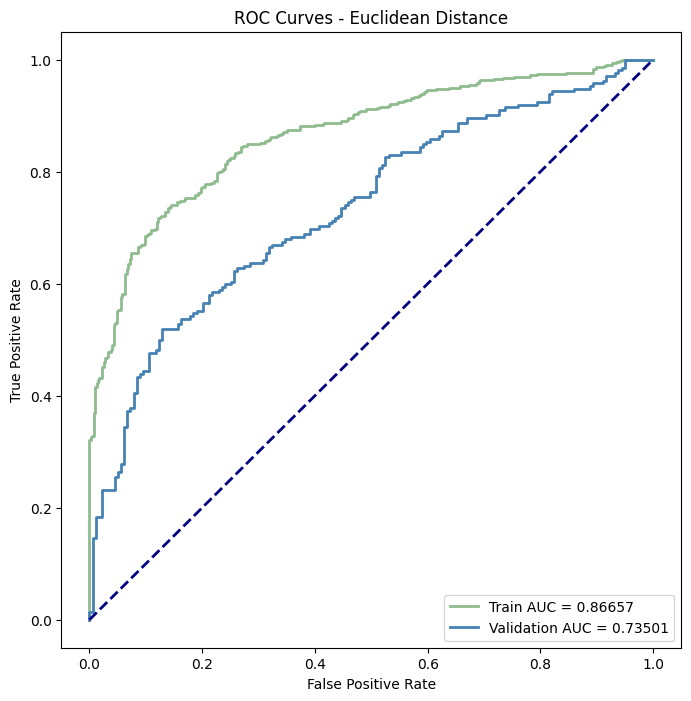

In [28]:
# Flatten the lists of labels
flat_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flat_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flat_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(flat_test_labels, normalized_test_euclidean_distance, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(flat_train_labels, normalized_train_euclidean_distance, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_validation, tpr_validation, thresholds_validation = roc_curve(flat_validation_labels, normalized_validation_euclidean_distance, drop_intermediate=False)
roc_auc_validation = auc(fpr_validation, tpr_validation)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
# plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

In [29]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [30]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_validation, tpr_validation, fpr) for fpr in target_fprs]

In [31]:
print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_validation}')

print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')


Train
TPR at FPR 0.100: 0.685
TPR at FPR 0.010: 0.369
TPR at FPR 0.001: 0.322
             AUC: 0.8665731106993674
Validation
TPR at FPR 0.100: 0.443
TPR at FPR 0.010: 0.146
TPR at FPR 0.001: 0.014
             AUC: 0.7350057974069779
Test
TPR at FPR 0.100: 0.363
TPR at FPR 0.010: 0.104
TPR at FPR 0.001: 0.052
             AUC: 0.7467056004791854
